In [7]:
import pandas as pd

df = pd.read_csv('gold.csv')
print(df.head())

         Date  United States(USD)  Europe(EUR)  Japan(JPY)  \
0  31-01-1979               233.7        144.8     45160.3   
1  28-02-1979               251.3        154.6     50209.1   
2  30-03-1979               240.1        148.0     50274.3   
3  30-04-1979               245.3        152.8     54144.6   
4  31-05-1979               274.6        172.0     61057.1   

   United Kingdom(GBP)  Canada(CAD)  Switzerland(CHF)  India(INR)  China(CNY)  \
0                117.4        267.1             379.3      1840.8         NaN   
1                124.2        295.5             413.6      2011.7         NaN   
2                116.2        278.2             406.2      1940.2         NaN   
3                118.8        278.5             420.0      2013.1         NaN   
4                132.7        321.6             478.0      2253.4         NaN   

   Turkey(TRY)  Saudi Arabia(SAR)  Indonesia(IDR)  United Arab Emirates(AED)  \
0          NaN              745.2        139739.3           

In [8]:
print(df.isnull().sum())
df = df.dropna()

Date                           0
United States(USD)             0
Europe(EUR)                    0
Japan(JPY)                     0
United Kingdom(GBP)            0
Canada(CAD)                    0
Switzerland(CHF)               0
India(INR)                     0
China(CNY)                    72
Turkey(TRY)                   47
Saudi Arabia(SAR)              0
Indonesia(IDR)                 0
United Arab Emirates(AED)      0
Thailand(THB)                  0
Vietnam(VND)                 131
Egypt(EGP)                   119
South Korean(KRW)              0
Australia(AUD)                 0
South Africa(ZAR)              0
dtype: int64


In [9]:
df = df[['Date', 'United States(USD)']]
df.to_csv('new_gold.csv', index=False)
new_df = pd.read_csv('new_gold.csv')
print(new_df.head())

         Date  United States(USD)
0  29-12-1989               398.6
1  31-01-1990               415.1
2  28-02-1990               407.7
3  30-03-1990               368.5
4  30-04-1990               367.8


C:\Users\Lynn\AppData\Local\Temp\ipykernel_16180\1487860837.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df['Date'] = pd.to_datetime(new_df['Date'])


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.42581, saving model to best_model.h5
8/8 - 3s - loss: 0.0239 - val_loss: 0.4258 - 3s/epoch - 375ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 0.42581 to 0.37028, saving model to best_model.h5
8/8 - 0s - loss: 0.0184 - val_loss: 0.3703 - 56ms/epoch - 7ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 0.37028 to 0.31609, saving model to best_model.h5
8/8 - 0s - loss: 0.0141 - val_loss: 0.3161 - 68ms/epoch - 8ms/step
Epoch 4/1000

Epoch 4: val_loss improved from 0.31609 to 0.26450, saving model to best_model.h5


c:\Users\Lynn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 - 0s - loss: 0.0124 - val_loss: 0.2645 - 61ms/epoch - 8ms/step
Epoch 5/1000

Epoch 5: val_loss improved from 0.26450 to 0.24158, saving model to best_model.h5
8/8 - 0s - loss: 0.0116 - val_loss: 0.2416 - 54ms/epoch - 7ms/step
Epoch 6/1000

Epoch 6: val_loss improved from 0.24158 to 0.22469, saving model to best_model.h5
8/8 - 0s - loss: 0.0111 - val_loss: 0.2247 - 52ms/epoch - 7ms/step
Epoch 7/1000

Epoch 7: val_loss improved from 0.22469 to 0.21602, saving model to best_model.h5
8/8 - 0s - loss: 0.0102 - val_loss: 0.2160 - 57ms/epoch - 7ms/step
Epoch 8/1000

Epoch 8: val_loss improved from 0.21602 to 0.20094, saving model to best_model.h5
8/8 - 0s - loss: 0.0093 - val_loss: 0.2009 - 73ms/epoch - 9ms/step
Epoch 9/1000

Epoch 9: val_loss improved from 0.20094 to 0.16181, saving model to best_model.h5
8/8 - 0s - loss: 0.0082 - val_loss: 0.1618 - 65ms/epoch - 8ms/step
Epoch 10/1000

Epoch 10: val_loss improved from 0.16181 to 0.12969, saving model to best_model.h5
8/8 - 0s - loss: 0.0

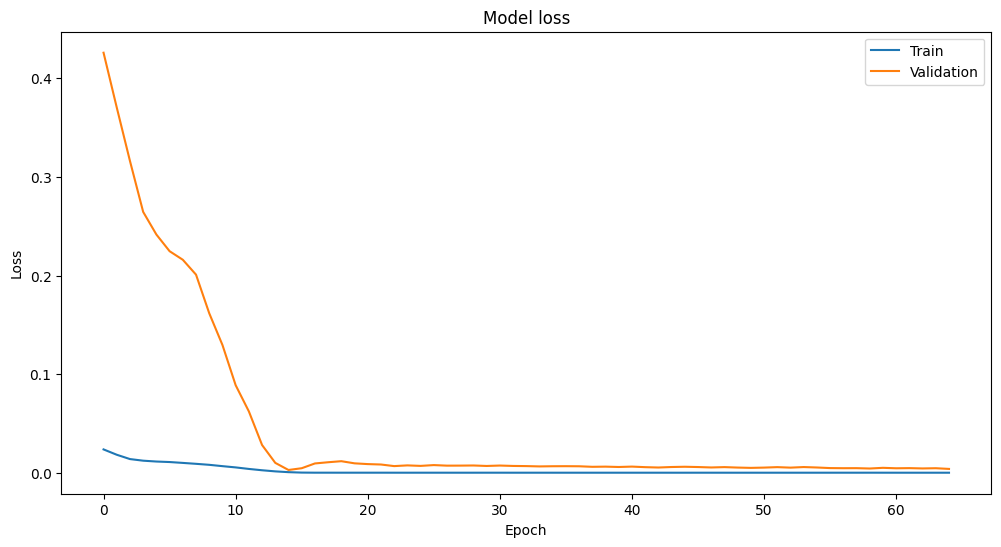

In [10]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame and it's already preprocessed
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df['Date'] = new_df['Date'].apply(lambda x: x.toordinal())

new_df.set_index('Date', inplace=True)

# Normalize the Dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create the input data and the target variable
X, y = [], []
for i in range(len(scaled_data)-1):
    X.append(scaled_data[i])
    y.append(scaled_data[i + 1])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the LSTM network
model.compile(loss='mean_squared_error', optimizer='adam')

# Create callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Fit the LSTM network with validation split
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2, callbacks=[es, mc], validation_split=0.2)

model.save('gold_price.h5')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

3/3 [==============================] - 1s 2ms/step


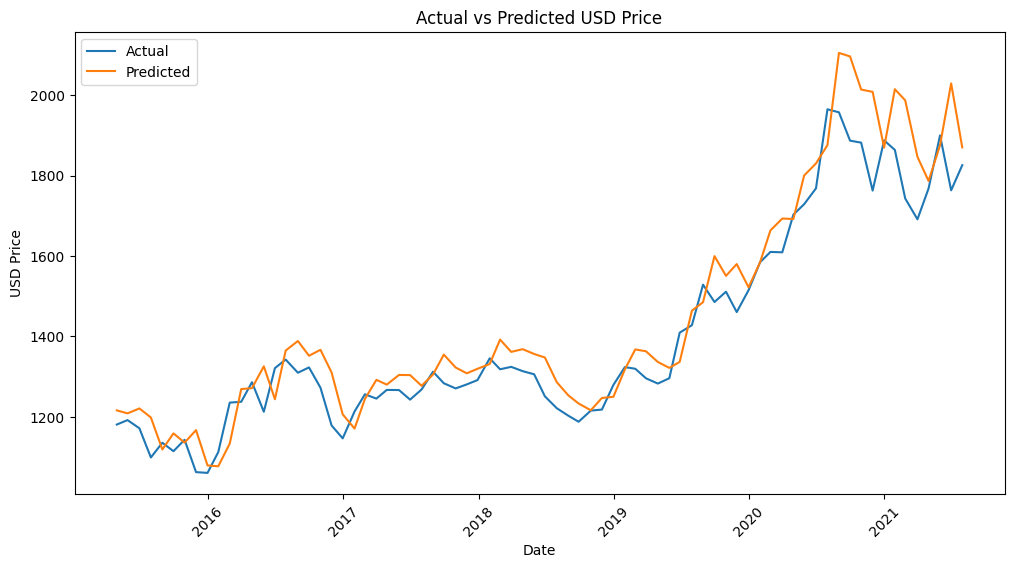

In [11]:
from keras.models import load_model
from datetime import datetime
# Load the best model
best_model = load_model('gold_price.h5')

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Inverse transform the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Convert Unix epoch to actual dates
y_pred_dates = [datetime.fromordinal(int(date)) for date in new_df.index[-len(y_pred):]]
y_test_dates = [datetime.fromordinal(int(date)) for date in new_df.index[-len(y_test):]]

# Create a dataframe for the predicted and actual values
df_pred = pd.DataFrame({'Date': y_pred_dates, 'USD Price (Predicted)': y_pred.flatten()})
df_actual = pd.DataFrame({'Date': y_test_dates, 'USD Price (Actual)': y_test.flatten()})

# Plot the predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(df_actual['Date'], df_actual['USD Price (Actual)'], label='Actual')
plt.plot(df_pred['Date'], df_pred['USD Price (Predicted)'], label='Predicted')
plt.title('Actual vs Predicted USD Price')
plt.xlabel('Date')
plt.ylabel('USD Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
